<a href="https://colab.research.google.com/github/curtiscu/LYIT/blob/master/LoadAllTheThings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup env


In [1]:
# print all cell output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Google drive access

In [2]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# test, peek at data
! ls -al '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/'

# test, modules from local  'E:\Google Drive\LYIT\Dissertation\modules'
! ls -al '/content/drive/My Drive/LYIT/Dissertation/modules/'

total 35
-rw------- 1 root root 2589 Apr 27 12:01 10_soul-groove10_102_beat_4-4.mid
-rw------- 1 root root 4793 Apr 27 12:01 1_funk-groove1_138_beat_4-4.mid
-rw------- 1 root root 3243 Apr 27 12:01 2_funk-groove2_105_beat_4-4.mid
-rw------- 1 root root 4466 Apr 27 12:01 3_soul-groove3_86_beat_4-4.mid
-rw------- 1 root root 2551 Apr 27 12:01 4_soul-groove4_80_beat_4-4.mid
-rw------- 1 root root 3798 Apr 27 12:01 5_funk-groove5_84_beat_4-4.mid
-rw------- 1 root root 3760 Apr 27 12:01 6_hiphop-groove6_87_beat_4-4.mid
-rw------- 1 root root 1894 Apr 27 12:01 7_pop-groove7_138_beat_4-4.mid
-rw------- 1 root root 2437 Apr 27 12:01 8_rock-groove8_65_beat_4-4.mid
-rw------- 1 root root 3448 Apr 27 12:01 9_soul-groove9_105_beat_4-4.mid
total 48
-rw------- 1 root root 28422 Aug  4 16:17 data_prep.py
drwx------ 2 root root  4096 May 10 13:31 __pycache__
-rw------- 1 root root  7524 Jul 31 19:30 stats_n_features.py
-rw------- 1 root root  8457 Aug  2 14:47 visualizations.py


## Auto reload module

Now using library code I've created and saved to google drive which is automatically pushed to the cloud and made available to the colab env. The autoreload stuff below should help imports to 'reimport' to load changes to the library code.

It's not the quickest/ most reliable, so if in a hurry, brute force loading of changes by restarting the runtime.

In [4]:
# tool to auto reload modules.
%load_ext autoreload

# config to auto-reload all modules, handy to make 
# writing and testing modules much easier.
%autoreload 2

## Imports and accessing lib functions

In [5]:
# install required libs
!pip install mido

     |████████████████████████████████| 61kB 1.9MB/s 


In [6]:
# import my modules
import sys
sys.path.append('/content/drive/My Drive/LYIT/Dissertation/modules/')
import data_prep as dp

>> LOADING custom module, when: 2020-08-13 20:11:50.568026, module name: stats_n_features
>> LOADING custom module, when: 2020-08-13 20:11:50.568953, module name: data_prep


In [7]:
# imports
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np


# object that provides colours for charts
from itertools import cycle



In [8]:
# testing auto reload of modules 
dp.test_function_call('bling')

Test function in data_prep.py called and worked! when: 2020-08-13 20:11:50.608025,  param:bling


In [9]:
import stats_n_features as sf

In [10]:
sf.test_function_call('hello')

Test function in stats_n_features called and worked! when: 2020-08-13 20:11:50.641520,  param:hello


## Pandas display options

In [11]:
def set_pandas_display_options() -> None:
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 2000
    display.max_colwidth = 1000
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()
#pd.reset_option('all')


# Test latest loading code

Loading code now pulls everything into dict of structures with the following layout ..
* PerformanceData = namedtuple('PerformanceData' , 'drummer_id file_df file_wrapper tools stats_df tight_df')

In [12]:
# dp.load_meta_file()

In [13]:
my_data = dp.load_all_data()

FILE name: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid
    loaded file: <midi file '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid' type 0, 1 tracks, 1300 messages>
    time sig: <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
    tempo: <meta message set_tempo tempo=434783 time=0>
    track count: 1, tracks: [<midi track 'MIDI' 1300 messages>]
    MIDI file type: 0
    > processing track: <midi track 'MIDI' 1300 messages>
    __notes pre-filter: [36. 37. 38. 40. 43. 44. 51. 52. 53. 55.]
    __applying filter: [44]
    __notes post filter: [36. 37. 38. 40. 43. 51. 52. 53. 55.]
    note_on span - first tick: 3 , last tick: 30658 
    good instruments: 5, {36.0: 'Bass Drum 1 (36)', 38.0: 'Acoustic Snare (38)', 43.0: 'High Floor Tom (43)', 49.0: 'Crash Cymbal 1 (49)', 51.0: 'Ride Cymbal 1 (51)'}
    ba

In [14]:
all_drummer_data = my_data

style_filter = "1_funk-groove1"  # first style to experiment with

for next_file in all_drummer_data.keys():
  perf_data = all_drummer_data[next_file]
  file_name = perf_data.file_wrapper.my_file_name
  if style_filter in file_name:
    print('data for: {}'.format(file_name))
    display(perf_data.tight_df.head(10))

data for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid


note  velocity  beat_offset  bar_beat_number
bar_number bar_beat_number                                               
1          1                   hh        55            7                1
           1                 kick        64           10                1
           3                 kick        57          -29                3
           3                   hh        31           -2                3
           5                   hh        54          -13                5
           5                snare        93           -5                5
           7                   hh        42          -16                7
           8                snare        33          -12                8
           10               snare        33          -14               10
           11                kick        59          -37               11

data for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid


note  velocity  beat_offset  bar_beat_number
bar_number bar_beat_number                                               
1          1                 kick        39            9                1
           1                   hh        67           15                1
           3                 kick        41          -14                3
           3                   hh        58           18                3
           4                 kick         6          -16                4
           5                   hh       119           15                5
           5                snare       106           33                5
           7                   hh        45           26                7
           8                snare        50           23                8
           9                   hh        53           36                9

data for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer7/eval_session/1_funk-groove1_138_beat_4-4.mid


note  velocity  beat_offset  bar_beat_number
bar_number bar_beat_number                                               
1          1                 kick        47            0                1
           1                   hh       113            0                1
           3                   hh        55            1                3
           3                 kick        43            5                3
           5                snare       108           25                5
           5                   hh       127           37                5
           7                   hh        57           17                7
           8                snare        62           15                8
           9                   hh        94           19                9
           10               snare        45           -5               10

data for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer8/eval_session/1_funk-groove1_138_beat_4-4.mid


note  velocity  beat_offset  bar_beat_number
bar_number bar_beat_number                                               
1          1                 kick        67            0                1
           1                   hh        40            0                1
           3                 kick        64          -30                3
           3                   hh        37          -12                3
           5                   hh        83          -12                5
           5                snare       127          -11                5
           7                   hh        31            0                7
           8                snare        97            8                8
           9                   hh        56           -5                9
           10               snare        52           -3               10

# Pick out a file

In [15]:
# experimenting on a single file here ...
key1 = '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid'
key2 = '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid'


test_data = all_drummer_data[key1]
df1 = test_data.tight_df.copy()

df2 = test_data = all_drummer_data[key2].tight_df.copy()


In [16]:
df1.head()
df2.head()

note  velocity  beat_offset  bar_beat_number
bar_number bar_beat_number                                              
1          1                  hh        55            7                1
           1                kick        64           10                1
           3                kick        57          -29                3
           3                  hh        31           -2                3
           5                  hh        54          -13                5

note  velocity  beat_offset  bar_beat_number
bar_number bar_beat_number                                              
1          1                kick        39            9                1
           1                  hh        67           15                1
           3                kick        41          -14                3
           3                  hh        58           18                3
           4                kick         6          -16                4

In [17]:
# pull out notes in 1st bar
display(df1.xs(9, level='bar_number')) 

,note,velocity,beat_offset,bar_beat_number
bar_beat_number,,,,
1,kick,60,-25,1
1,hh,54,-11,1
1,snare,33,47,1
3,kick,60,-25,3
3,hh,38,-17,3
5,snare,97,-20,5
5,hh,70,-17,5
7,hh,38,-8,7
8,snare,99,-16,8


# Descriptive statistics

Check out..
* https://realpython.com/python-statistics/#measures-of-central-tendency


## Summary metrics by instrument

In [18]:
print(' stats for: {}'.format(key1))
df1.describe()
#df1.groupby(['bar_beat_number', 'note'])['beat_offset'].count()
print(' stats for: {}'.format(key2))
df2.describe()

 stats for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid


,velocity,beat_offset,bar_beat_number
count,259.000000,259.000000,259.000000
mean,59.023166,-8.382239,7.528958
std,23.861508,16.705284,4.585338
min,8.000000,-58.000000,1.000000
25%,44.000000,-17.000000,3.000000
50%,52.000000,-7.000000,8.000000
75%,65.500000,1.500000,11.000000
max,127.000000,55.000000,16.000000


 stats for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid


,velocity,beat_offset,bar_beat_number
count,297.000000,297.000000,297.000000
mean,57.993266,8.774411,8.124579
std,30.944260,18.573438,4.639137
min,6.000000,-58.000000,1.000000
25%,40.000000,-4.000000,3.000000
50%,46.000000,11.000000,9.000000
75%,74.000000,22.000000,12.000000
max,127.000000,46.000000,16.000000


In [19]:
import statistics
print('variance stats for: {}'.format(key1))
print('  vel: {}'.format(statistics.variance(df1.velocity)))
print('  off: {}'.format(statistics.variance(df1.beat_offset)))


print('variance stats for: {}'.format(key2))
print('  vel: {}'.format(statistics.variance(df2.velocity)))
print('  off: {}'.format(statistics.variance(df2.beat_offset)))


variance stats for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid
  vel: 569.371554278531
  off: 279.0665050432492
variance stats for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid
  vel: 957.5472517972518
  off: 344.9725862225862


# Plotting: boxploty stuffs

Seaborn, boxplot type stuffs...
* https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/
* https://seaborn.pydata.org/generated/seaborn.stripplot.html
* https://monashdatafluency.github.io/python-workshop-base/modules/plotting_with_ggplot/
* https://plotnine.readthedocs.io/en/stable/index.html
* https://www.kaggle.com/residentmario/grammar-of-graphics-with-plotnine-optional/
* https://www.dummies.com/education/math/statistics/what-a-boxplot-can-tell-you-about-a-statistical-data-set/

.. and stuff to consider when creating boxplots...
* https://www.data-to-viz.com/caveat/boxplot.html

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataframe boxplots
See...
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

In [21]:
print('variance stats for: {}'.format(key1))
df1['beat_offset'].groupby(df1['note']).describe()
df1['velocity'].groupby(df1['note']).describe()

variance stats for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,126.0,-4.674603,13.097071,-41.0,-12.00,-3.5,4.0,27.0
kick,54.0,-14.777778,15.486655,-54.0,-24.75,-13.0,-4.0,10.0
snare,79.0,-9.924051,20.791253,-58.0,-21.00,-8.0,0.5,55.0


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,126.0,50.436508,9.891003,30.0,44.0,49.0,56.00,83.0
kick,54.0,60.796296,15.543463,42.0,52.0,59.5,63.75,127.0
snare,79.0,71.506329,35.822523,8.0,33.0,90.0,102.00,117.0


In [22]:
print('variance stats for: {}'.format(key2))
df2['beat_offset'].groupby(df2['note']).describe()
df2['velocity'].groupby(df2['note']).describe()

variance stats for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,128.0,15.640625,15.394924,-31.0,6.0,19.0,26.00,46.0
kick,68.0,-3.985294,17.289884,-49.0,-14.0,-4.5,8.25,35.0
snare,101.0,8.663366,18.675266,-58.0,-2.0,11.0,22.00,38.0


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,128.0,67.437500,25.019284,33.0,48.0,59.0,82.25,125.0
kick,68.0,31.955882,12.393347,6.0,21.0,36.0,43.00,48.0
snare,101.0,63.554455,36.469844,10.0,39.0,46.0,105.00,127.0


data for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,126.0,-4.674603,13.097071,-41.0,-12.00,-3.5,4.0,27.0
kick,54.0,-14.777778,15.486655,-54.0,-24.75,-13.0,-4.0,10.0
snare,79.0,-9.924051,20.791253,-58.0,-21.00,-8.0,0.5,55.0


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,126.0,50.436508,9.891003,30.0,44.0,49.0,56.00,83.0
kick,54.0,60.796296,15.543463,42.0,52.0,59.5,63.75,127.0
snare,79.0,71.506329,35.822523,8.0,33.0,90.0,102.00,117.0


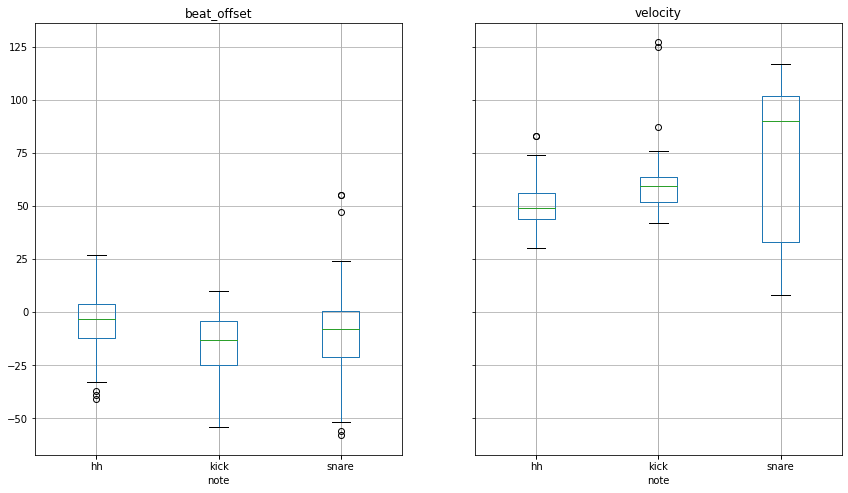

data for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,128.0,15.640625,15.394924,-31.0,6.0,19.0,26.00,46.0
kick,68.0,-3.985294,17.289884,-49.0,-14.0,-4.5,8.25,35.0
snare,101.0,8.663366,18.675266,-58.0,-2.0,11.0,22.00,38.0


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,128.0,67.437500,25.019284,33.0,48.0,59.0,82.25,125.0
kick,68.0,31.955882,12.393347,6.0,21.0,36.0,43.00,48.0
snare,101.0,63.554455,36.469844,10.0,39.0,46.0,105.00,127.0


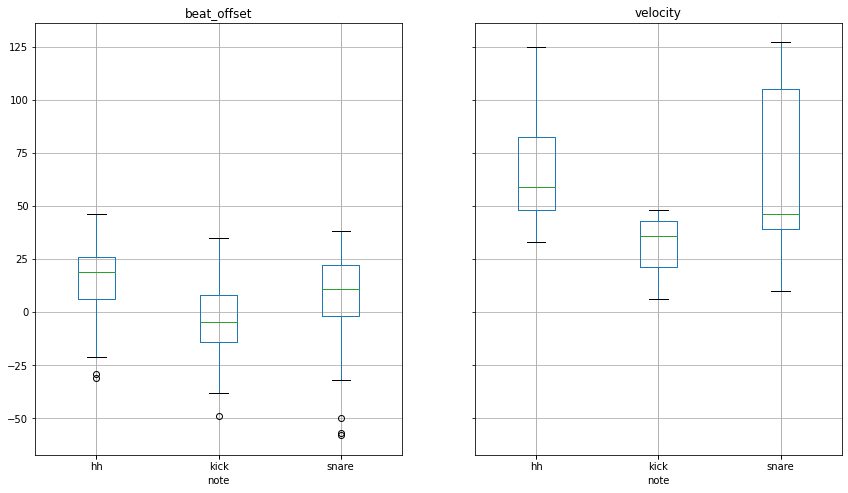

data for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer7/eval_session/1_funk-groove1_138_beat_4-4.mid


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,123.0,5.406504,13.446212,-29.0,-4.00,6.0,13.50,38.0
kick,56.0,0.375000,15.546485,-52.0,-8.25,3.0,9.25,30.0
snare,72.0,2.763889,12.853994,-27.0,-7.00,3.0,12.00,33.0


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,123.0,98.601626,29.360043,47.0,69.00,110.0,127.00,127.0
kick,56.0,47.125000,14.636272,19.0,35.75,48.0,56.25,82.0
snare,72.0,85.319444,32.378843,41.0,50.75,95.5,115.75,127.0


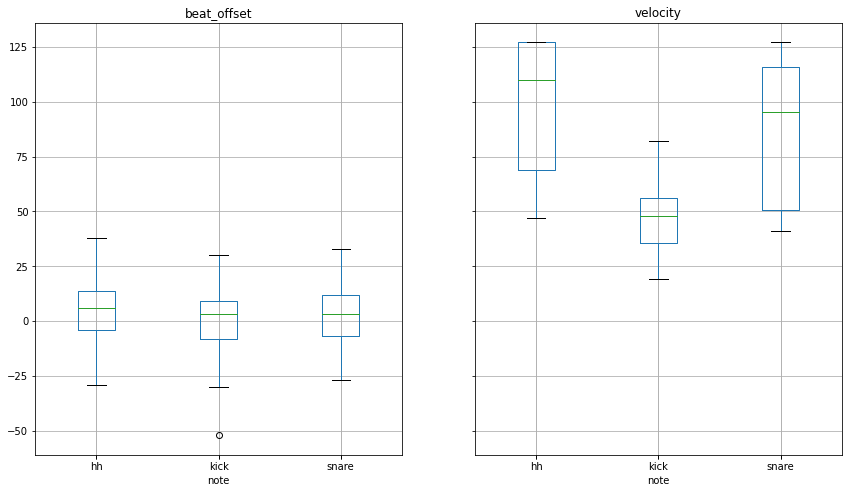

data for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer8/eval_session/1_funk-groove1_138_beat_4-4.mid


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,127.0,6.047244,13.019435,-33.0,-2.5,6.0,13.50,41.0
kick,56.0,-1.500000,13.976604,-36.0,-8.0,0.0,7.00,25.0
snare,96.0,1.510417,21.671225,-60.0,-8.0,1.0,13.25,43.0


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,127.0,67.614173,30.906425,13.0,41.50,57.0,91.50,127.0
kick,56.0,60.785714,10.715688,43.0,49.75,64.0,69.25,80.0
snare,96.0,80.520833,36.394036,11.0,49.50,73.5,124.75,127.0


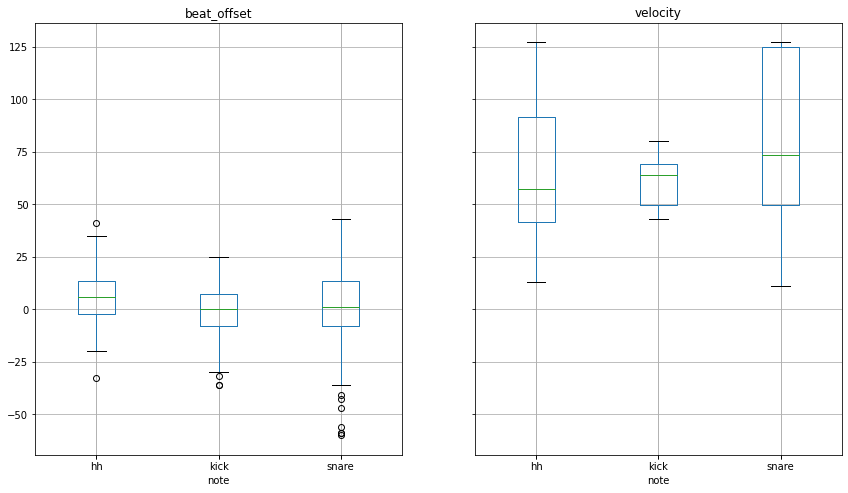

In [23]:
style_filter = "1_funk-groove1"  # first style to experiment with

for next_file in all_drummer_data.keys():
  perf_data = all_drummer_data[next_file]
  file_name = perf_data.file_wrapper.my_file_name
  df_1 = perf_data.tight_df
  if style_filter in file_name:
    print('data for: {}'.format(file_name))
    df_1['beat_offset'].groupby(df_1['note']).describe()
    df_1['velocity'].groupby(df_1['note']).describe()
    _ = df_1.boxplot(by='note', column=['beat_offset', 'velocity'], figsize=(14, 8))
    #plt.title("")
    _ = plt.suptitle("")
    _ = plt.show()


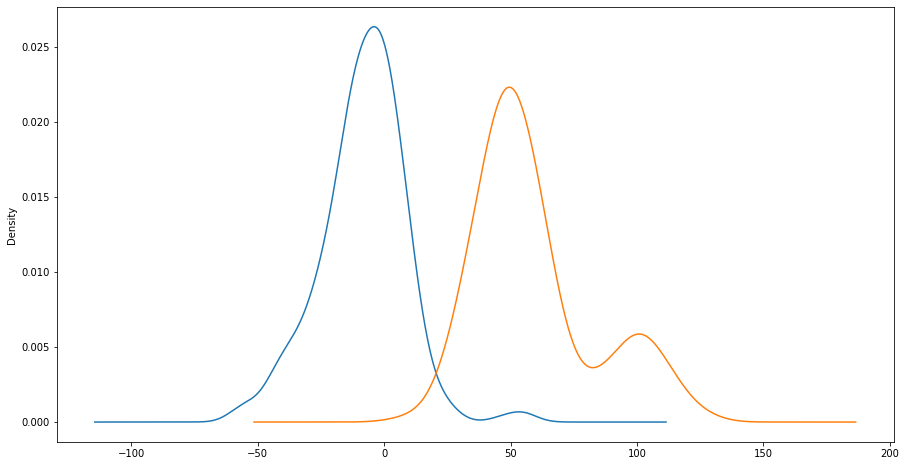

In [24]:
#df1.count()
df1.beat_offset.plot(kind='kde')
df1.velocity.plot(kind='kde', figsize=(15, 8))
#df1.plot(kind='kde', figsize=(15, 8))
#df1[df1.note == 'hh'].beat_offset.plot(kind='kde')
#df1[df1.note == 'snare'].beat_offset.plot(kind='kde')
#df1[df1.note == 'kick'].beat_offset.plot(kind='kde')

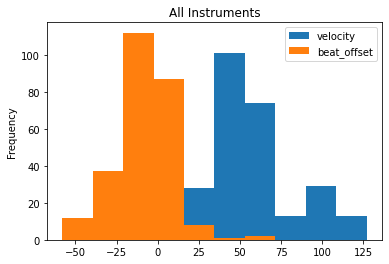

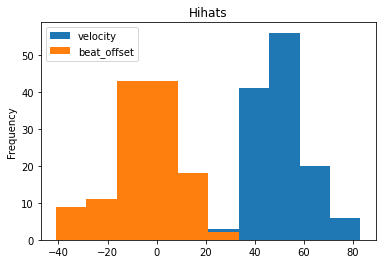

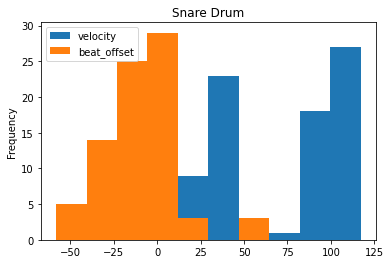

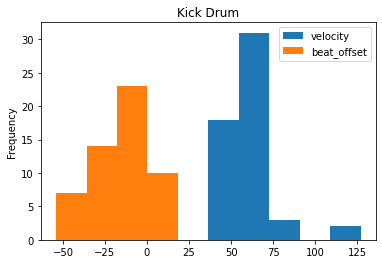

In [25]:
#df1.plot(kind='hist', x='bar_beat_number', title='All Instruments', subplots=True)
df1.plot(kind='hist', x='bar_beat_number', title='All Instruments')


df1[df1.note == 'hh'].plot(kind='hist', x='bar_beat_number', title='Hihats')
df1[df1.note == 'snare'].plot(kind='hist', x='bar_beat_number', title='Snare Drum')
df1[df1.note == 'kick'].plot(kind='hist', x='bar_beat_number', title='Kick Drum')



## Av offsets, per metric pos

In [26]:
df1['beat_offset'].groupby([df1['bar_beat_number']]).describe()

,count,mean,std,min,25%,50%,75%,max
bar_beat_number,,,,,,,,
1,36.0,-9.111111,23.869619,-58.0,-23.25,-7.5,1.50,55.0
2,5.0,-21.400000,14.842507,-38.0,-35.00,-18.0,-13.00,-3.0
3,32.0,-10.812500,11.417128,-41.0,-15.25,-10.5,-1.75,11.0
4,7.0,-8.285714,8.920282,-20.0,-14.50,-8.0,-3.00,5.0
5,32.0,-4.312500,11.017398,-30.0,-8.50,-4.0,1.00,20.0
7,16.0,1.375000,12.878276,-29.0,-5.00,3.5,7.75,27.0
8,16.0,-11.687500,14.987634,-44.0,-18.00,-12.0,-0.75,10.0
9,15.0,-1.666667,14.365965,-33.0,-9.00,0.0,5.00,23.0
10,15.0,-5.600000,14.608217,-28.0,-14.50,-5.0,4.00,24.0


<Figure size 1872x720 with 0 Axes>

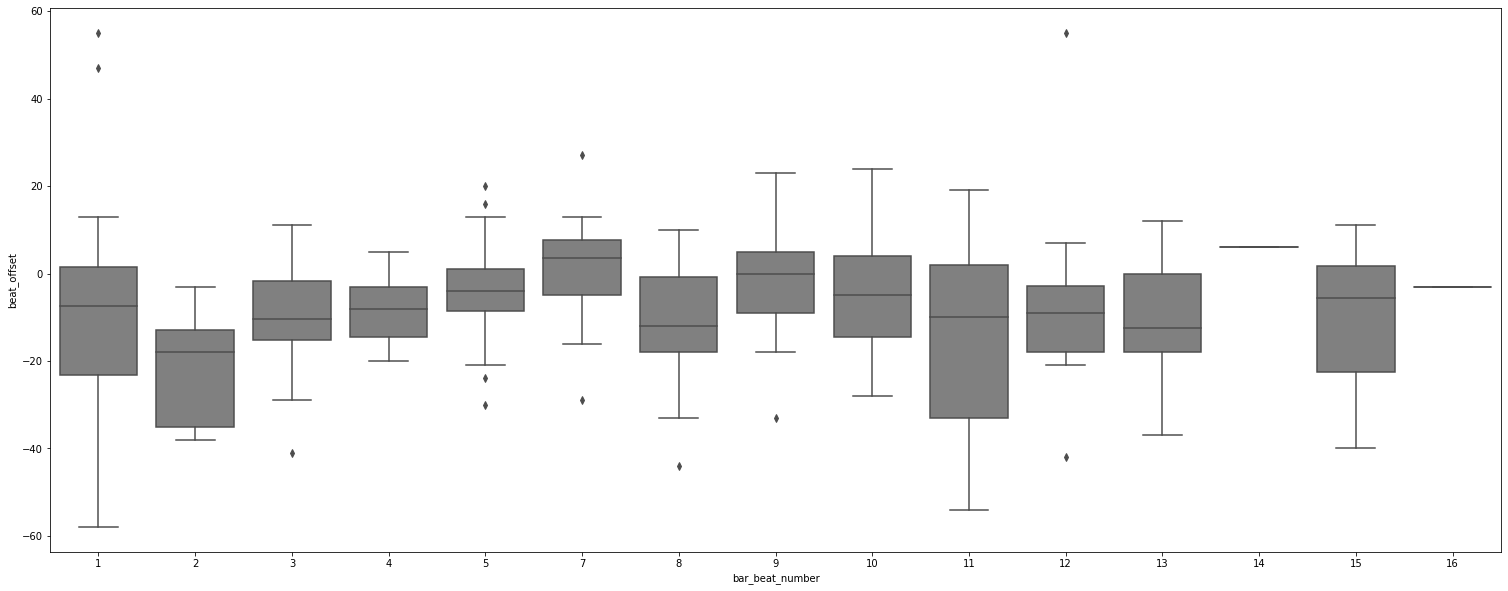

In [27]:
plt.figure(figsize=(26, 10))
sns.boxplot(y='beat_offset', x='bar_beat_number', 
            data=df1,
            color='grey') 
            #color='blue') 
            #palette="colorblind")
            #hue='note')


## Av offset, per instrument, per pos.

In [28]:
# This shows essentially the stats used to produce the boxplots below
df1['beat_offset'].groupby([df1['bar_beat_number'], df1['note']]).describe()

count       mean        std   min    25%   50%    75%  \
bar_beat_number note                                                           
1               hh      16.0  -2.937500  10.828781 -29.0  -9.50  -2.5   6.25   
                kick    12.0  -9.250000  12.144022 -25.0 -19.25  -8.0  -3.25   
                snare    8.0 -21.250000  45.937069 -58.0 -53.00 -41.0  -6.25   
2               snare    5.0 -21.400000  14.842507 -38.0 -35.00 -18.0 -13.00   
3               hh      16.0 -11.062500  12.401445 -41.0 -15.25 -11.5  -1.75   
                kick    16.0 -10.562500  10.745348 -29.0 -16.75 -10.0  -2.75   
4               hh       3.0  -8.666667   3.055050 -12.0 -10.00  -8.0  -7.00   
                kick     4.0  -8.000000  12.355835 -20.0 -17.75  -8.5   1.25   
5               hh      16.0  -3.687500  12.213210 -30.0  -6.25  -2.0   1.00   
                snare   16.0  -4.937500  10.043032 -24.0  -8.50  -6.0   0.25   
7               hh      16.0   1.375000  12.878276 -29.0  -5.00   3.5   7.75   
8               snare   16.0 -11.687500  14.987634 -44.0 -18.00 -12.0  -0.75   
9               hh      15.0  -1.666667  14.365965 -33.0  -9.00   0.0   5.00   
10              snare   15.0  -5.600000  14.608217 -28.0 -14.50  -5.0   4.00   
11              hh      12.0  -0.083333  13.255931 -32.0  -6.50   2.0   6.00   
                kick    15.0 -25.866667  18.627425 -54.0 -40.00 -26.0 -12.00   
12              kick     6.0 -17.333333  13.351654 -42.0 -20.00 -13.5  -8.50   
                snare    2.0  31.000000  33.941125   7.0  19.00  31.0  43.00   
13              hh      16.0  -9.875000  12.268523 -37.0 -18.00 -11.5   0.00   
                snare    8.0 -11.250000  10.727135 -24.0 -18.25 -15.0  -5.00   
14              kick     1.0   6.000000        NaN   6.0   6.00   6.0   6.00   
15              hh      16.0  -7.375000  14.750706 -39.0 -15.25  -5.5   6.25   
                snare    8.0 -15.750000  17.490814 -40.0 -32.00 -12.5  -1.25   
16              snare    1.0  -3.000000        NaN  -3.0  -3.00  -3.0  -3.00   

                        max  
bar_beat_number note         
1               hh     13.0  
                kick   10.0  
                snare  55.0  
2               snare  -3.0  
3               hh     11.0  
                kick    6.0  
4               hh     -6.0  
                kick    5.0  
5               hh     20.0  
                snare  16.0  
7               hh     27.0  
8               snare  10.0  
9               hh     23.0  
10              snare  24.0  
11              hh     19.0  
                kick    6.0  
12              kick   -6.0  
                snare  55.0  
13              hh     12.0  
                snare   7.0  
14              kick    6.0  
15              hh     11.0  
                snare   4.0  
16              snare  -3.0

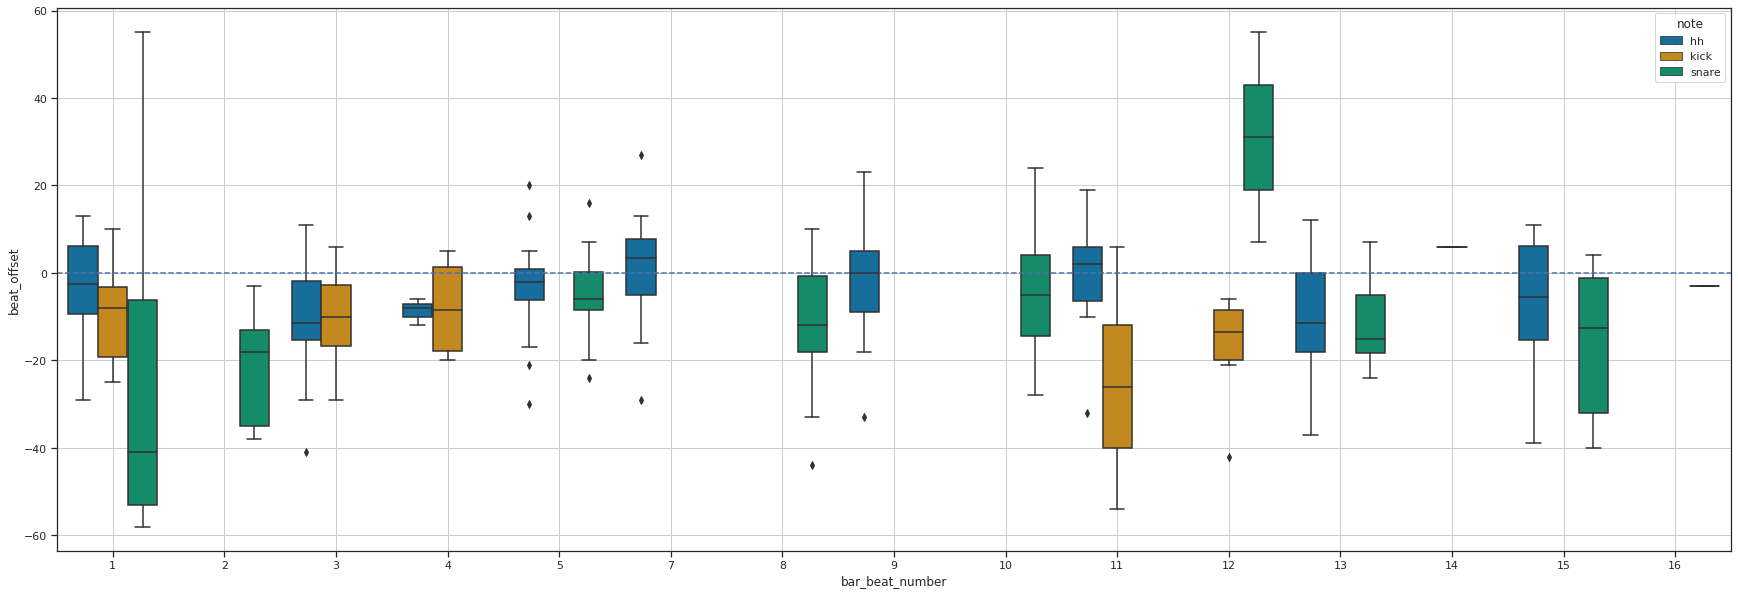

In [29]:
#plt.figure(figsize=(26, 10))
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(30, 10))

graph = sns.boxplot(y='beat_offset', x='bar_beat_number', 
                 data=df1,
                 palette="colorblind",
                 hue='note')
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.yaxis.grid(True)

graph.axhline(0, linestyle='--')
plt.show()

The above is clearer with added lines on x & y-axes, and the horiztonal line for '0', but doesn't give an indication of the numbers of notes.

This next version gives a better idea of the numbers of strikes/ notes per position...


<Figure size 1872x720 with 0 Axes>

<Figure size 1872x720 with 0 Axes>

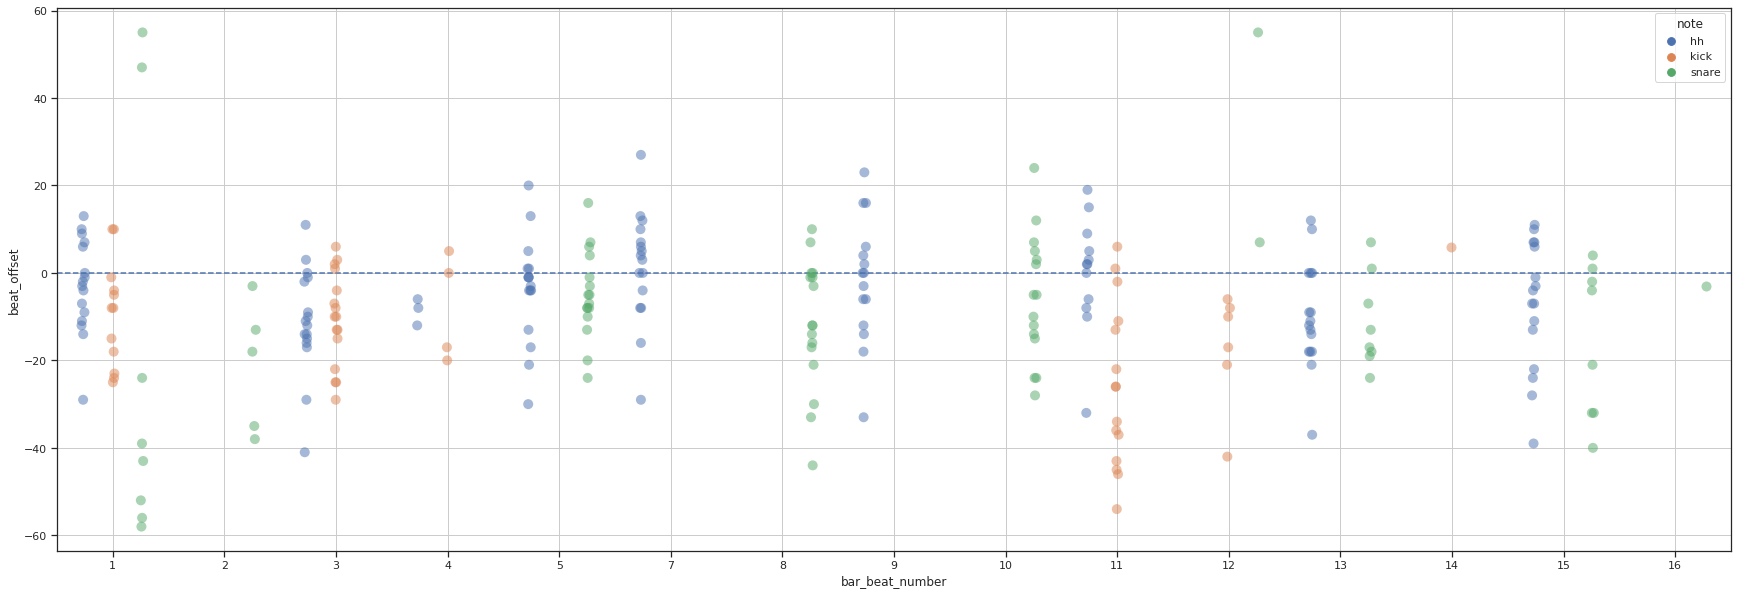

In [30]:
plt.figure(figsize=(26, 10))

f, ax = plt.subplots(figsize=(30, 10))

graph = sns.stripplot(y='beat_offset', x='bar_beat_number', 
                   data=df1, 
                   #jitter=True,
                   jitter=0.05,
                   dodge=True,
                   marker='o', 
                   alpha=0.5,
                   hue='note',
                   size=10)


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.yaxis.grid(True)

graph.axhline(0, linestyle='--')
plt.show()

Next version combines previous two, clear indication of median, IQR, etc. and more clearly shows numbers of strikes/ notes per position.

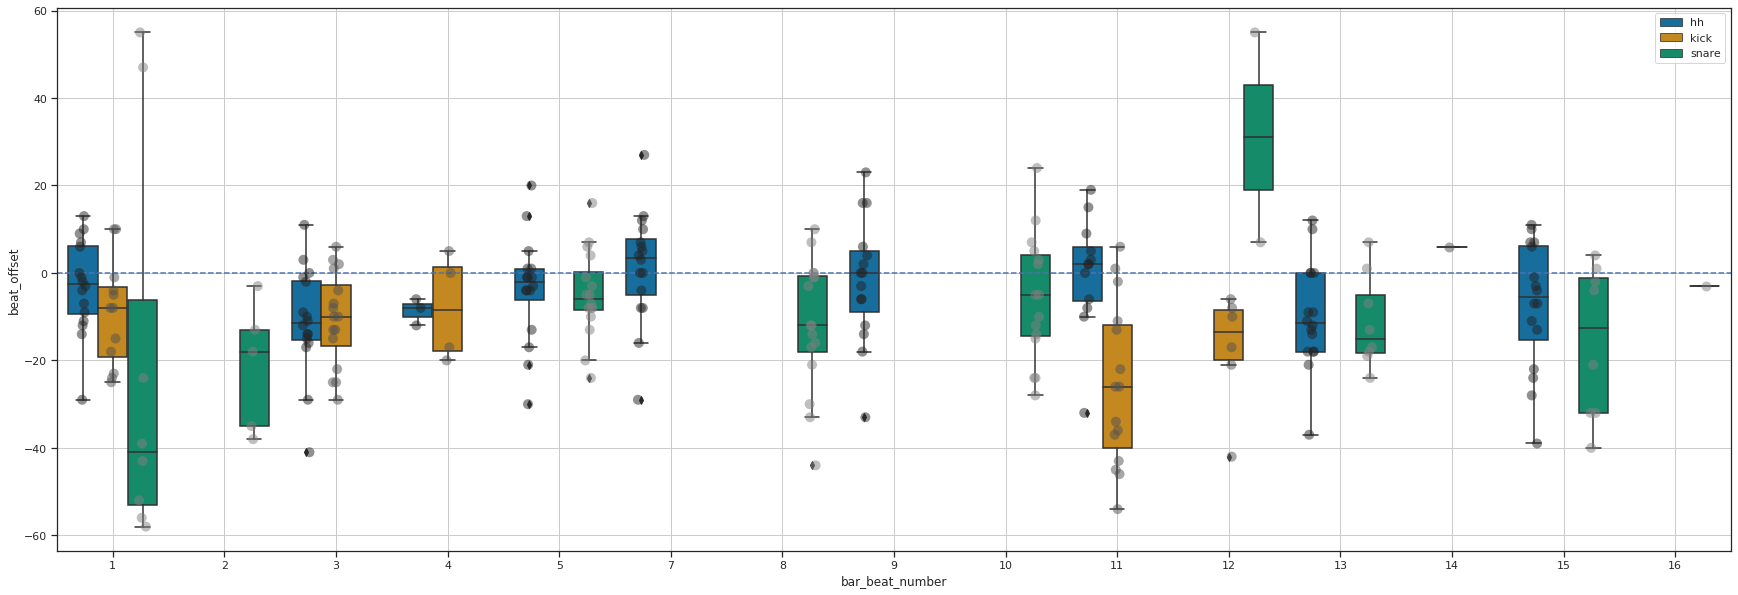

In [31]:
#plt.figure(figsize=(26, 10))
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(30, 10))


# make grouped boxplot
graph = sns.boxplot(y='beat_offset', x='bar_beat_number', 
                 data=df1, 
                 palette="colorblind", 
                  hue='note')
# make grouped stripplot
graph = sns.stripplot(y='beat_offset', x='bar_beat_number', 
                   data=df1, 
                   jitter=0.1,
                   dodge=True, 
                   marker='o', 
                   alpha=0.5,
                   hue='note',
                   color='grey',
                   size=10)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.yaxis.grid(True)

graph.axhline(0, linestyle='--')

# get legend information from the plot object
handles, labels = graph.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:3], labels[0:3])

plt.show()


## Av velocity, per pos

<Figure size 1872x720 with 0 Axes>

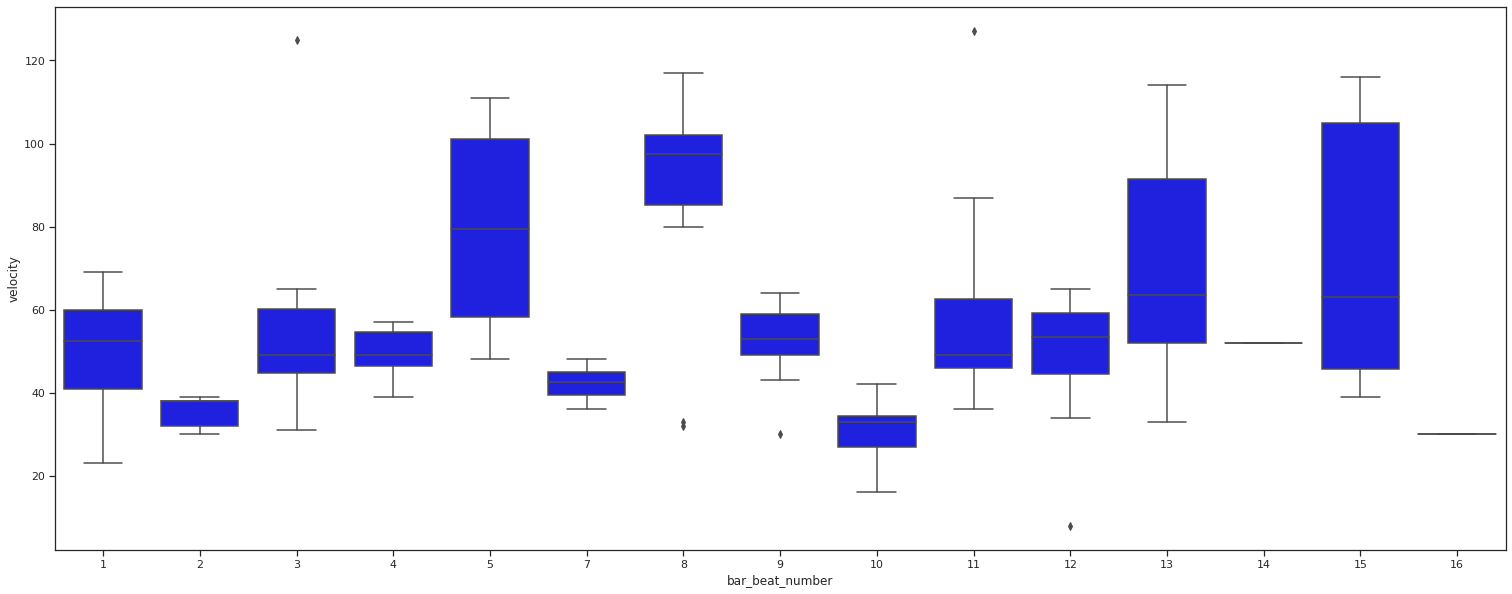

In [32]:
plt.figure(figsize=(26, 10))
sns.boxplot(y='velocity', x='bar_beat_number', 
                 data=df1, 
            color='blue') 
                 #palette="colorblind")
                 #hue='note')


<Figure size 1872x720 with 0 Axes>

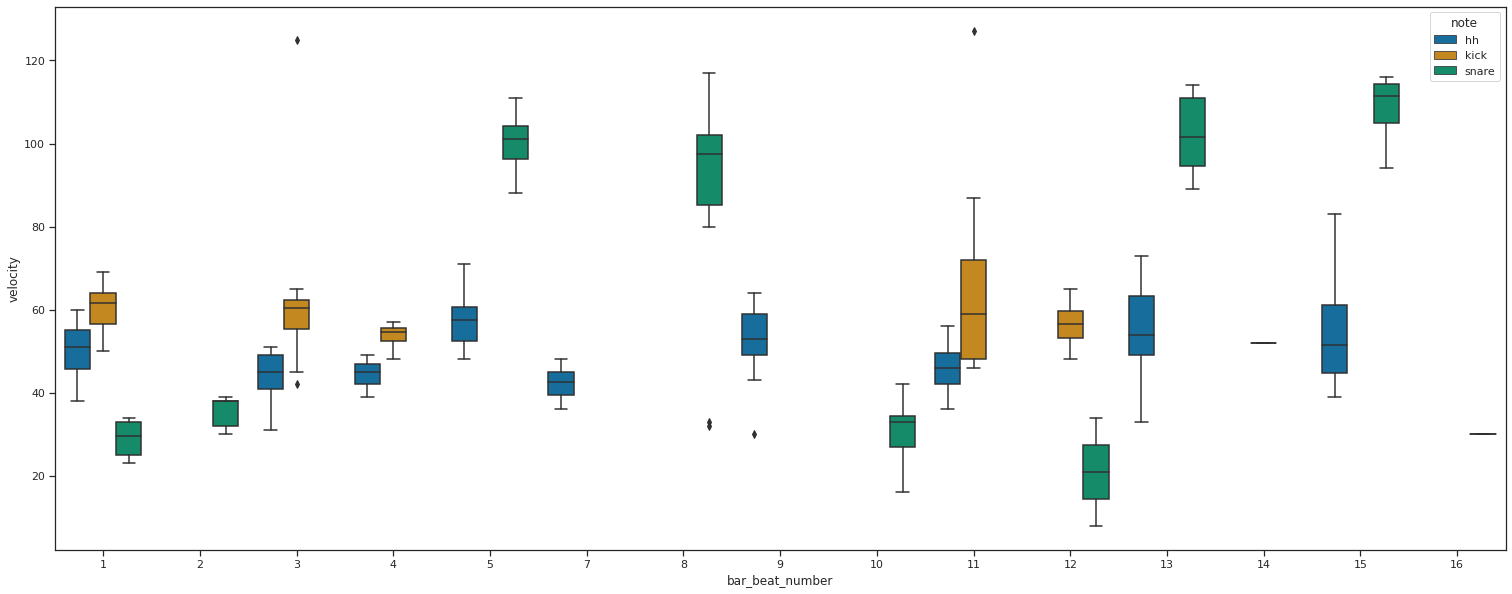

In [33]:
plt.figure(figsize=(26, 10))
sns.boxplot(y='velocity', x='bar_beat_number', 
                 data=df1, 
            # color='blue') 
                 palette="colorblind",
                 hue='note')

# Old visualisation code
* ::TODO:: test this out!
* not sure this is compatible any more with the data format I currently have, see how far back in the data format I need to go to produce these

In [34]:
#import visualizations as viz

# One file: one-hot, get_dummies

One-Hot, get_dummies stuff, a la..
*  https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
* https://stats.stackexchange.com/questions/231285/dropping-one-of-the-columns-when-using-one-hot-encoding
* alternative, see Albon book, pg82, sklearn.preprocessing.LabelBinarizer

In [35]:
df3 = df1.copy()

# one-hot the column specifying kick/ snare/ hh
pd.get_dummies(df3.note, prefix='note', drop_first=True).head(10) 

# one-hot the column specifying metric position in the bar
pd.get_dummies(df3.bar_beat_number, prefix='beat', drop_first=True).head(10)

note_kick  note_snare
bar_number bar_beat_number                       
1          1                        0           0
           1                        1           0
           3                        1           0
           3                        0           0
           5                        0           0
           5                        0           1
           7                        0           0
           8                        0           1
           10                       0           1
           11                       1           0

beat_2  beat_3  beat_4  beat_5  beat_7  beat_8  \
bar_number bar_beat_number                                                   
1          1                     0       0       0       0       0       0   
           1                     0       0       0       0       0       0   
           3                     0       1       0       0       0       0   
           3                     0       1       0       0       0       0   
           5                     0       0       0       1       0       0   
           5                     0       0       0       1       0       0   
           7                     0       0       0       0       1       0   
           8                     0       0       0       0       0       1   
           10                    0       0       0       0       0       0   
           11                    0       0       0       0       0       0   

                            beat_9  beat_10  beat_11  beat_12  beat_13  \
bar_number bar_beat_number                                               
1          1                     0        0        0        0        0   
           1                     0        0        0        0        0   
           3                     0        0        0        0        0   
           3                     0        0        0        0        0   
           5                     0        0        0        0        0   
           5                     0        0        0        0        0   
           7                     0        0        0        0        0   
           8                     0        0        0        0        0   
           10                    0        1        0        0        0   
           11                    0        0        1        0        0   

                            beat_14  beat_15  beat_16  
bar_number bar_beat_number                             
1          1                      0        0        0  
           1                      0        0        0  
           3                      0        0        0  
           3                      0        0        0  
           5                      0        0        0  
           5                      0        0        0  
           7                      0        0        0  
           8                      0        0        0  
           10                     0        0        0  
           11                     0        0        0

Now do it for real, append the new one-hot cols, remove the cols that made them...

In [36]:
df4 = df3.copy()

# join the new columns with  original dataframe
df4 = pd.concat([df4,pd.get_dummies(df4.note, prefix='note', drop_first=True)],axis=1)
#df4.drop('note',axis=1, inplace=True)  # drop original 'note' col

df4 = pd.concat([df4,pd.get_dummies(df4.bar_beat_number, prefix='beat', drop_first=True)],axis=1)
#df4.drop('bar_beat_number',axis=1, inplace=True)  # drop original 'note' col

df4.head(25)

note  velocity  beat_offset  bar_beat_number  \
bar_number bar_beat_number                                                  
1          1                   hh        55            7                1   
           1                 kick        64           10                1   
           3                 kick        57          -29                3   
           3                   hh        31           -2                3   
           5                   hh        54          -13                5   
           5                snare        93           -5                5   
           7                   hh        42          -16                7   
           8                snare        33          -12                8   
           10               snare        33          -14               10   
           11                kick        59          -37               11   
           11                  hh        42          -32               11   
           13                  hh        64          -18               13   
           13               snare       114            7               13   
           15                  hh        44           -1               15   
           16               snare        30           -3               16   
2          1                   hh        42           -7                1   
           1                 kick        55           -5                1   
           3                 kick        62          -10                3   
           3                   hh        41            3                3   
           5                snare        94            4                5   
           5                   hh        51            5                5   
           7                   hh        45            7                7   
           8                snare        32            7                8   
           9                   hh        43            2                9   
           10               snare        24           -5               10   

                            note_kick  note_snare  beat_2  beat_3  beat_4  \
bar_number bar_beat_number                                                  
1          1                        0           0       0       0       0   
           1                        1           0       0       0       0   
           3                        1           0       0       1       0   
           3                        0           0       0       1       0   
           5                        0           0       0       0       0   
           5                        0           1       0       0       0   
           7                        0           0       0       0       0   
           8                        0           1       0       0       0   
           10                       0           1       0       0       0   
           11                       1           0       0       0       0   
           11                       0           0       0       0       0   
           13                       0           0       0       0       0   
           13                       0           1       0       0       0   
           15                       0           0       0       0       0   
           16                       0           1       0       0       0   
2          1                        0           0       0       0       0   
           1                        1           0       0       0       0   
           3                        1           0       0       1       0   
           3                        0           0       0       1       0   
           5                        0           1       0       0       0   
           5                        0           0       0       0       0   
           7                        0           0       0       0       0   
           8                        0           1       0       0       0   
           9            

# One file: normalization ::TODO::

References, comments, thoughts...
* Many algorithms need data rescaled and perform better with it, some behave fine with unscaled data e.g. decision trees, random forests.
* [Scaling from scratch](https://machinelearningmastery.com/scale-machine-learning-data-scratch-python/)
* [Robust Scalar](https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/) :  value = (value – median) / (p75 – p25)
* https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
* https://stats.stackexchange.com/questions/77350/perform-feature-normalization-before-or-within-model-validation
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
* ["Not only do you need normalisation, but you should apply the exact same scaling as for your training data. That means storing the scale and offset used with your training data, and using that again. A common beginner mistake is to separately normalise your train and test data."](https://datascience.stackexchange.com/a/27616)


In summary...
* Normalize - don't know distribution, or know it's not guassian, algorithm doesn't make assumptions about distribution

* Standardization - assumes data is Guassian/ bell shaped, and when algorithms assumes Guassian.

* Robust scalar - Scales features using statistics that are robust to outliers, uses median and quantiles, consists of subtracting the median from an observation and then dividing by the interquartile difference. Distributions are not centered in zero and the standard deviation is not 1. Min & max values set to a certain upper and lower boundaries like in the MinMaxScaler.

* BUT - the Groove MIDI paper explicitly states, it scales offsets to between -0.5 and +0.5, and velocity to between 0 and 1.

Final step to prep data for KNN, I need to do some scaling of the columns: 'velocity', 'beat_offset' ..

In [37]:

# testing...

x = [1, 2, 3, 4]

def normalize(x):
    maxx, minx = max(x), min(x)
    max_minus_min = maxx - minx
    return [(elt - minx) / max_minus_min for elt in x]

print(normalize(x))


[0.0, 0.3333333333333333, 0.6666666666666666, 1.0]


In [38]:
# take a look at what we have so far...
df4.describe()

,velocity,beat_offset,bar_beat_number,note_kick,note_snare,beat_2,beat_3,beat_4,beat_5,beat_7,beat_8,beat_9,beat_10,beat_11,beat_12,beat_13,beat_14,beat_15,beat_16
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,59.023166,-8.382239,7.528958,0.208494,0.305019,0.019305,0.123552,0.027027,0.123552,0.061776,0.061776,0.057915,0.057915,0.104247,0.030888,0.092664,0.003861,0.092664,0.003861
std,23.861508,16.705284,4.585338,0.407018,0.461307,0.137861,0.329707,0.162476,0.329707,0.241214,0.241214,0.234035,0.234035,0.306172,0.173349,0.290523,0.062137,0.290523,0.062137
min,8.000000,-58.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,-17.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.000000,-7.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.500000,1.500000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,127.000000,55.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
from sklearn.preprocessing import MinMaxScaler

Get dataframe column/ series into the right shape for use in the following MinMaxScaler...
* https://stackoverflow.com/a/40698011

In [40]:
####################
# sort out velocity scaling
#####################

data = df4.velocity
#print(type(data.values))
#print(data.values)
scaler = MinMaxScaler(feature_range=(0, 1))
x = data.values.reshape(-1, 1) #returns a numpy array
#print (x)
x_scaled = scaler.fit_transform(x)
df4['velocity_scaled'] = x_scaled

######################
# offset scaling
######################

data = df4.beat_offset
#print(type(data.values))
#print(data.values)
scaler = MinMaxScaler(feature_range=(-0.5, 0.5))
x = data.values.reshape(-1, 1) #returns a numpy array
#print (x)
x_scaled = scaler.fit_transform(x)
df4['offset_scaled'] = x_scaled


df4.describe()
df4.head(50)


,velocity,beat_offset,bar_beat_number,note_kick,note_snare,beat_2,beat_3,beat_4,beat_5,beat_7,beat_8,beat_9,beat_10,beat_11,beat_12,beat_13,beat_14,beat_15,beat_16,velocity_scaled,offset_scaled
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,59.023166,-8.382239,7.528958,0.208494,0.305019,0.019305,0.123552,0.027027,0.123552,0.061776,0.061776,0.057915,0.057915,0.104247,0.030888,0.092664,0.003861,0.092664,0.003861,0.428766,-0.060905
std,23.861508,16.705284,4.585338,0.407018,0.461307,0.137861,0.329707,0.162476,0.329707,0.241214,0.241214,0.234035,0.234035,0.306172,0.173349,0.290523,0.062137,0.290523,0.062137,0.200517,0.147834
min,8.000000,-58.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000
25%,44.000000,-17.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.302521,-0.137168
50%,52.000000,-7.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.369748,-0.048673
75%,65.500000,1.500000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483193,0.026549
max,127.000000,55.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000


note  velocity  beat_offset  bar_beat_number  \
bar_number bar_beat_number                                                  
1          1                   hh        55            7                1   
           1                 kick        64           10                1   
           3                 kick        57          -29                3   
           3                   hh        31           -2                3   
           5                   hh        54          -13                5   
           5                snare        93           -5                5   
           7                   hh        42          -16                7   
           8                snare        33          -12                8   
           10               snare        33          -14               10   
           11                kick        59          -37               11   
           11                  hh        42          -32               11   
           13                  hh        64          -18               13   
           13               snare       114            7               13   
           15                  hh        44           -1               15   
           16               snare        30           -3               16   
2          1                   hh        42           -7                1   
           1                 kick        55           -5                1   
           3                 kick        62          -10                3   
           3                   hh        41            3                3   
           5                snare        94            4                5   
           5                   hh        51            5                5   
           7                   hh        45            7                7   
           8                snare        32            7                8   
           9                   hh        43            2                9   
           10               snare        24           -5               10   
           11                kick        47          -46               11   
           11                  hh        36            2               11   
           12                kick        54          -21               12   
           13               snare        89          -13               13   
           13                  hh        54            0               13   
           15                  hh        39            7               15   
3          1                 kick        57           -4                1   
           1                   hh        45           -3                1   
           3                 kick        62           -8                3   
           3                   hh        45            0                3   
           5                snare        88           -3                5   
           5                   hh        50            1                5   
           7                   hh        36            4                7   
           8                snare        86          -12                8   
           9                   hh        49            6                9   
           10               snare        27          -15               10   
           11                kick        66           -2               11   
           11                  hh        47            0               11   
           13                  hh        39          -11               13   
           15                  hh        51          -13               15   
           15               snare        94           -2               15   
4          1                   hh        43          -12                1   
           2                snare        38          -35                2   
           3                   hh        41          -29                3   
           3                 kick        45          -25                3   

                        

## NOTE: the above hasn't worked as expected ::TODO:: fix this! 
- there are offset notes at 0 (zero) and the scaled number is *not* zero. 

## 3-4D plots
Experimenting with other plots...
* https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots

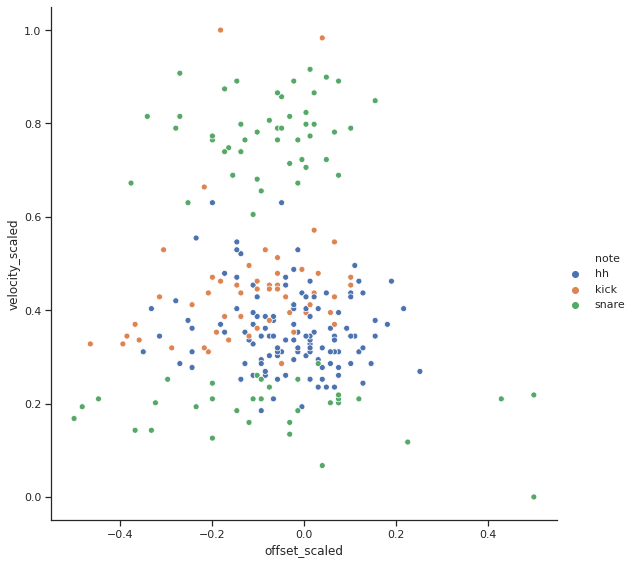

In [56]:
#plt.figure(figsize=(10, 10))
sns.relplot(x="offset_scaled", y="velocity_scaled", hue="note"
, data=df4, height=8)
#sns.relplot(x="offset_scaled", y="velocity_scaled", hue="bar_beat_number", style="note", data=df4, height=12)

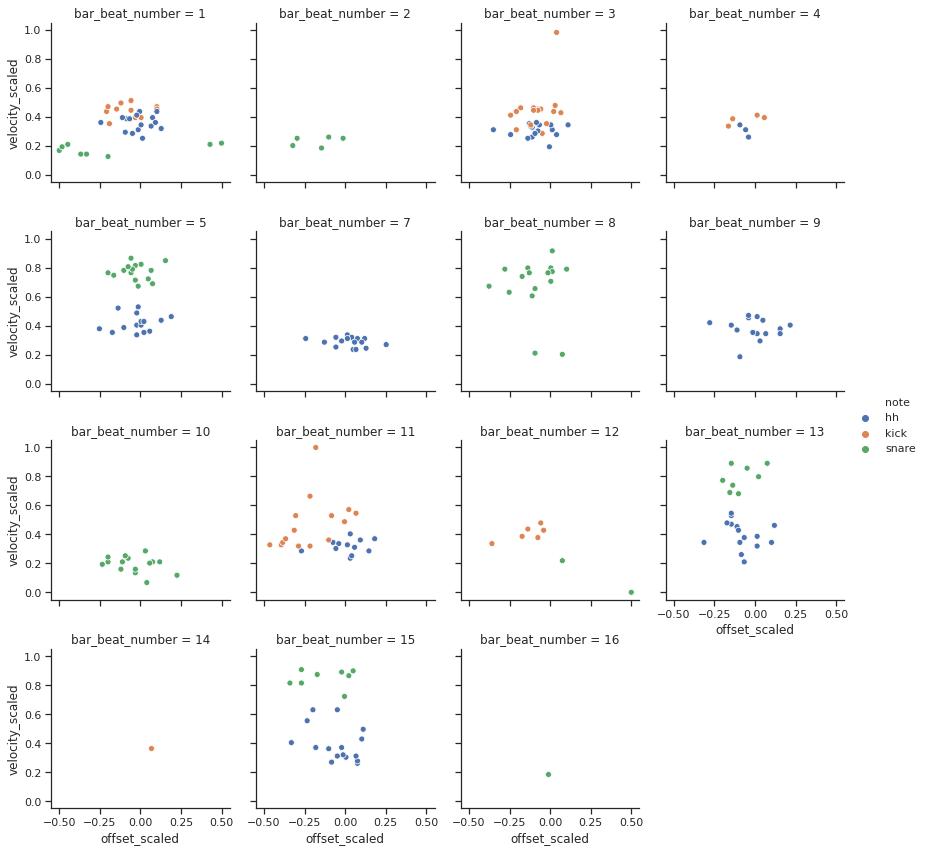

In [60]:

# sns.relplot(x="offset_scaled", y="velocity_scaled", hue="note", col="bar_beat_number", col_wrap=4, data=df4, height=3)

sns.relplot(x="offset_scaled", y="velocity_scaled", hue="note", col="bar_beat_number", col_wrap=4, data=df4, height=3)


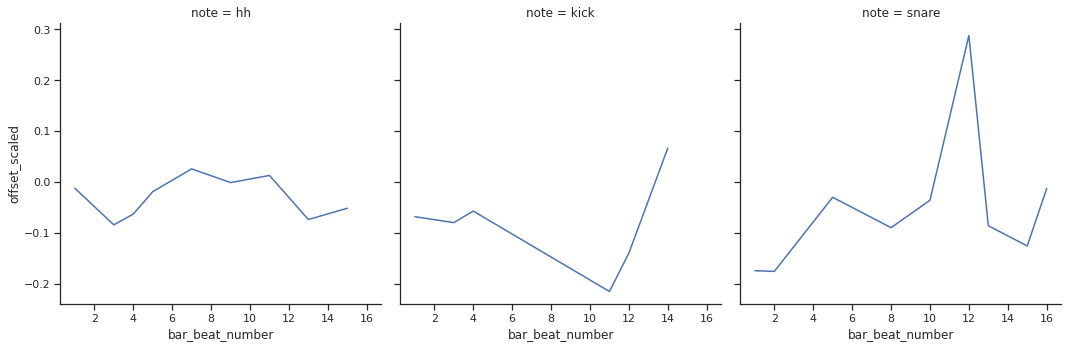

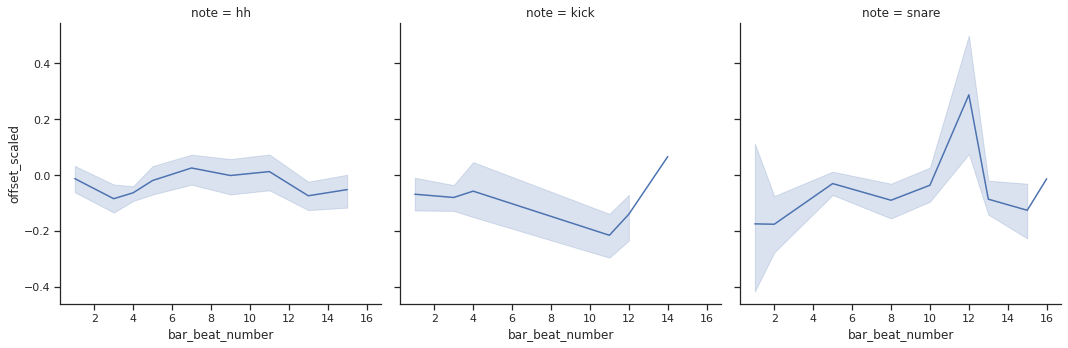

In [75]:
sns.relplot(x="bar_beat_number", y="offset_scaled", col="note", col_wrap=3, data=df4, height=5, kind="line", ci=None)
sns.relplot(x="bar_beat_number", y="offset_scaled", col="note", col_wrap=3, data=df4, height=5, kind="line")
#sns.relplot(x="bar_beat_number", y="offset_scaled", hue="note", data=df4, height=10, kind="line")



# KNN experiments ::TODO::
Just a wee reminder, some handy links...

Tutorial on manipulating MultiIndexes here ...
* https://github.com/ZaxR/pandas_multiindex_tutorial/blob/master/Pandas%20MultiIndex%20Tutorial.ipynb


Example using df.xs to extract info...
* display(multi_col_lvl_df.xs(('2018-07-10', 'Booooze', 'Wine'), level=['Date', 'Department', 'Category']).head(10))

Dataframe.xs (cross section) ...
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html




```
For KNN, data needs to be in format ..
- Observation X = Class Y

Suggested data format
- X = [instrument, metric position, offset, velocity]
- Y = best guess at which drummer it is.

Details..
- instrument = kick, snare, hh/ ride (categorical, order not important = nominal categorical)
- metric position = 1 to 16  (numeric, order not important = nominal categorical)
- offset = -60 to +60  (offset range is # ticks per beat, +/- half of that)
- velocity = 0 to 127 (MIDI volume range is 1 to 127)
```


